# 1. Boston 주택가격 예측 모델
- Boston Housing 데이터셋을 이용해 주택 가격을 예측
- ---

## 데이터셋 features 
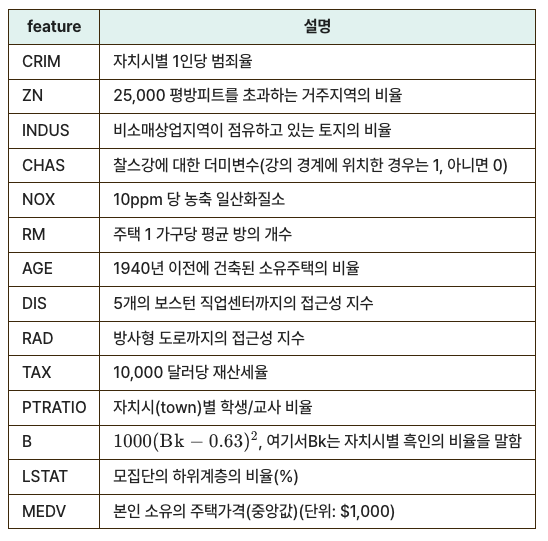

## 데이터 로드

In [1]:
# 필요 라이브러리 다운
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# data check
train_data.shape

(404, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

## Preprocessing

### Data Scaling
- 각 데이터의 특성이 중앙은 0에 가깝고, 표준편차는 1이 되게 함
- scale이 비슷해야 더 좋은 성능을 만들수 있기 때문
```plain text
[예시]
Original Data: [5, 15, 25, 35, 45]
Mean: 25, Standard Deviation: 15

Centered Data: [-20, -10, 0, 10, 20]
Standardized Data: [-1.33, -0.67, 0, 0.67, 1.33]
```
> (데이터 - 평균) / 표준편차

    👉 `(데이터 - 평균)` : 데이터를 0에 가까운 지점으로 중앙에 몰리도록 만들수 있다   
    👉  `/ 표준편차` : 데이터 스케일을 맞춰줌
- 위의 식으로 직접 스케일링을 진행하지만
  - scikit-learn의 `StandardScaler`기능을 불러와서 바로 사용할수도 있다

In [5]:
import numpy as np

# combine train and test data for consistency in preprocessing
all_data = np.concatenate([train_data, test_data], axis=0)

# mean
mean_values = np.mean(all_data, axis=0)
# std
std_values = np.std(all_data, axis=0)

# Scaling
train_data = (train_data - mean_values) / std_values
test_data = (test_data - mean_values) / std_values

# data check
train_data[0]

array([-0.2770909 , -0.48772236, -0.43725801, -0.27259857, -0.14421743,
       -0.20320532,  0.82234174,  0.08644935, -0.6379618 , -0.6012761 ,
        1.17646583,  0.44105193,  0.85042548])

## 모델 구성 및 컴파일

In [6]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

✅ 확인할 부분!
- Regression 예측은
  - 마지막 Dense층의 feature를 1로 지정, 활성화함수 없이 층을 만든다!
  - 데이터셋의 여러 feature중에 MEDV 주택가격 하나만 예측해내면 되기 때문이라고 생각
 

---

## 모델 학습

In [7]:
# early stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

# epoch를 늘리고, 조기종료 옵션을 넣는다
history = model.fit(train_data, train_labels, epochs=100, batch_size=64, validation_split=0.3, callbacks=[early_stop])

Epoch 1/100
5/5 [==============================] - 0s 17ms/step - loss: 545.6828 - mae: 21.6216 - val_loss: 624.1822 - val_mae: 22.7647
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 531.6310 - mae: 21.2771 - val_loss: 608.5845 - val_mae: 22.4056
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 517.0795 - mae: 20.9080 - val_loss: 592.5785 - val_mae: 22.0284
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 502.3270 - mae: 20.5208 - val_loss: 575.6315 - val_mae: 21.6158
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 486.3878 - mae: 20.0959 - val_loss: 557.4383 - val_mae: 21.1611
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 469.0550 - mae: 19.6222 - val_loss: 537.3878 - val_mae: 20.6502
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 449.8567 - mae: 19.1056 - val_loss: 515.1057 - val_mae: 20.0732
Epoch 8/100
5/5 [==============================] - 0s 

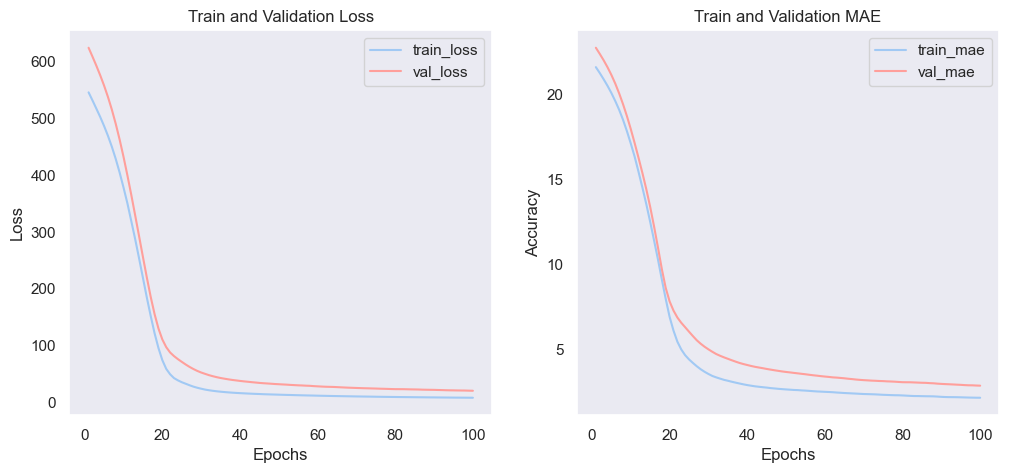

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

import seaborn as sns

sns.set_theme(style='darkgrid', palette='pastel')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [9]:
# evaluation
mse, mae = model.evaluate(test_data, test_labels)
print(mse, mae)

# prediction
ypred = model.predict(test_data)
print('Actual Price = {} and Predicted Price = {}'.format(test_labels[1], ypred[1]))

4/4 [==============================] - 0s 1ms/step - loss: 22.1251 - mae: 3.1330
22.125062942504883 3.1329970359802246
4/4 [==============================] - 0s 560us/step
Actual Price = 18.8 and Predicted Price = [16.32297]


- 거의 비슷하게 가격을 예측해낸다. 데이터셋 크기도 작고, 별다른 장치를 넣지 않았는데도 좋은 결과가 나오는게 신기하다.
  - 99%의 정확도를 만드는게 어려운거겠지..?   
    👉 상원님 설명에 따르면 선형회귀예측인데다 데이터 수도 많지 않아서 모델이 단순해야 좋은 결과가 나오는거라고 한다!
- 머신러닝때 엄청 많은 알고리즘들을 공부했던 부분만 기억나고 세부적으로 모델을 어떻게 만들었는지는 전혀 기억이 나지 않는다.
  - 머신러닝 부분을 다시 공부해봐야겠다.